# Koreliacija COVID-19 pandemijos metu
> BTC ir ETH koreliacija su rinkomis pandemijos metu.

- toc: true 
- badges: true
- comments: false
- categories: [Dominykas Tautkus]
- image: images/BTC_price.png

In [1]:
#hide
%load_ext autoreload
%autoreload 2
import warnings
warnings.filterwarnings('ignore')
import plotly.graph_objects as go
import pandas as pd
import plotly.express as px
from scripts.read_data import read_api
from scripts.read_data import read_news
from scripts.read_data import read_covid
import matplotlib.pyplot as plt 
import numpy as np
import pandas as pd
import seaborn as sns 
from IPython.display import Markdown as md
sns.set()

In [2]:
#hide
df_all = read_api()
#df_all.index.name = 'date'

df_all.index = pd.to_datetime(df_all.index)
df_covid = df_all.loc[df_all.index > '2019-12-31 08:00:00']
df_covid = df_covid[['ETH', 'BTC', 'XAU', 'SP500']]
#df_covid = df_covid[['ETH', 'BTC', 'XAU']] ;

In [3]:
#hide
market = read_news('market')
covid = read_covid() ;

### Šios dienos kriptovaliutų ir pandemijos naujienos

In [4]:
#hide_input
#md('##### {}'.format(titleBTC)) 
md("- {}{} {}{} [| Skaityti daugiau]({}) ".format(market['title'],'. ', market['body'], ' ...', market['url']))

- Non-Fungible Token Sales Begin to Dive, NFT Interest Declines, Finance Author Highlights NFT Oversupply.  Non-fungible token (NFT) assets and collectibles are starting to see sales decline and interest in NFTs is dropping as well. Additionally, it&#8217;s being said that an &#8220;oversupply of NFTs&#8221; may hurt the market, according to James Surowiecki the author of &#8220;The Wisdom of Crowds.&#8221; In 2021, non-fungible tokens have been all the rage and the [&#8230;] ... [| Skaityti daugiau](https://news.bitcoin.com/non-fungible-token-sales-begin-to-dive-nft-interest-declines-finance-author-highlights-nft-oversupply/) 

In [5]:
#hide_input
#md('##### {}'.format(titleETH)) 
md("- {}{} {}{} [| Skaityti daugiau]({}) ".format(covid['title'],'. ', covid['description'], ' ...', covid['url']))

- ‘Covid status certificates’ to be trialled in plan to bring back sports and nightclubs.  ‘We are doing everything we can to enable the reopening of our country so people can return to the events, travel and other things they love as safely as possible’, PM says ... [| Skaityti daugiau](http://www.independent.co.uk/news/uk/home-news/vaccine-passport-boris-johnson-covid-b1826503.html) 

### Kainų kaita pandemijos metu

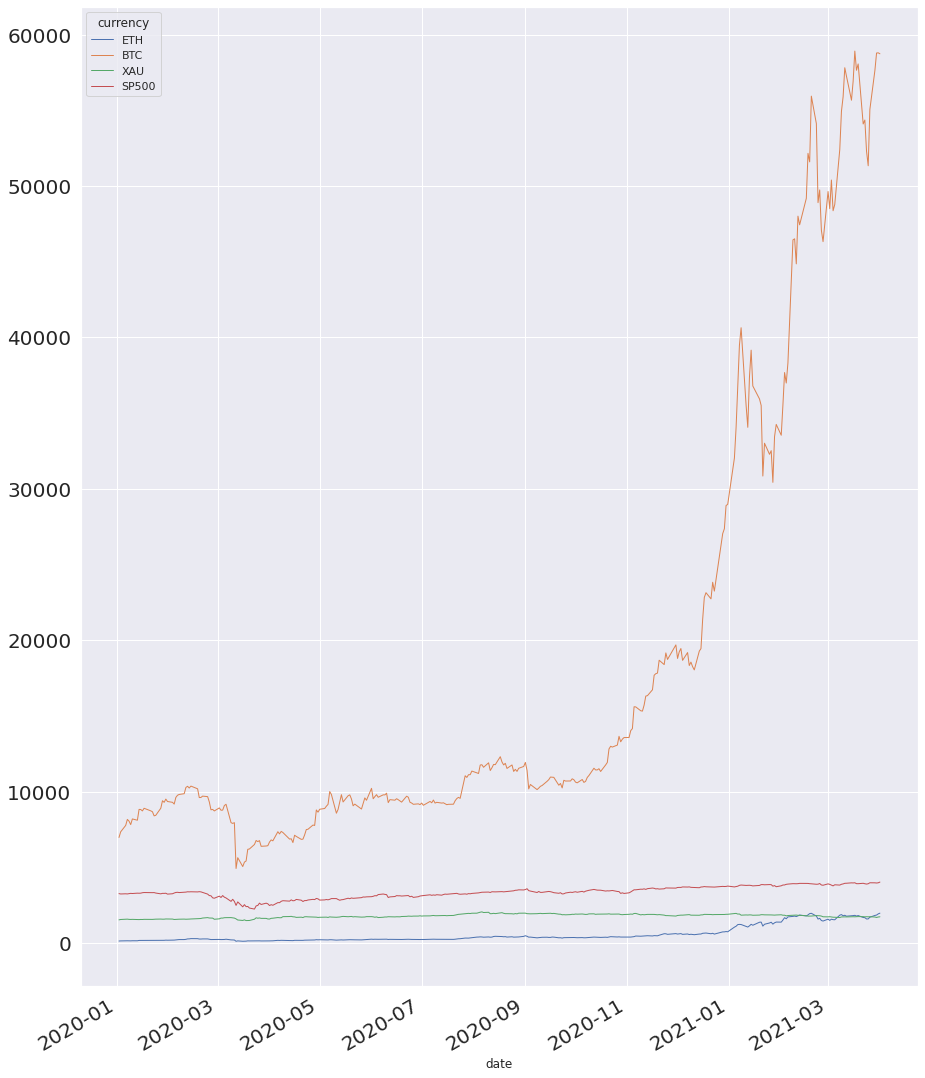

In [6]:
#hide_input
df_covid.plot(figsize=(15,20), linewidth=1, fontsize=20) ;
# plt.savefig('covid-price.eps', format='eps')

### Koreliacija pandemijos metu 

Koreliacijos koeficiento (Spirmano r) matrica.

In [7]:
#hide_input
df_covid.corr()  

currency,ETH,BTC,XAU,SP500
currency,,,,
ETH,1.000000,0.985182,0.181491,0.794673
BTC,0.985182,1.000000,0.123361,0.784559
XAU,0.181491,0.123361,1.000000,0.435017
SP500,0.794673,0.784559,0.435017,1.000000


In [8]:
#hide ### Koreliacijos matrica.

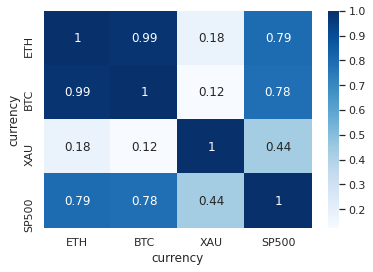

In [9]:
#hide
sns.heatmap(df_covid.corr(), annot=True, cmap="Blues") ;
# plt.savefig('covid.eps', format='eps')